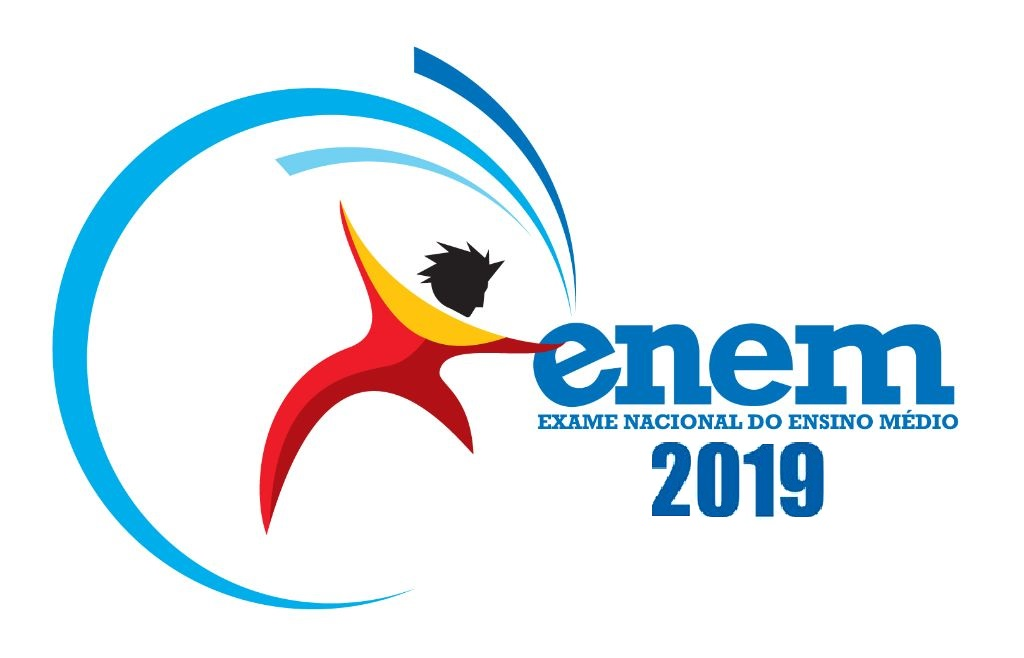

Neste projeto será realizada uma análise exploratória dos microdados do Enem 2019, fornecidos no próprio [site do INEP](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem).
<p>Para a análise explotória foram selecionadas apenas as variáveis de interesse, pois o dataset possui um número muito grande de dados que não se encaixam no escopo desta análise.
<p>Foram feitas diversas análises, em um primeiro momento, utilizando os dados de todos os inscritos no Enem 2019, e posteriormente, utilizando os dados apenas dos candidatos que tiverem comparecido para realizar as provas objetivas e a prova discursiva.

 - ``SG_UF_RESIDENCIA`` - Sigla da unidade da Federação da residência do participante
 - ``TP_SEXO`` - Sexo do participante
 - ``TP_ESTADO_CIVIL`` - Estado civil do participante
 - ``TP_COR_RACA`` - Cor/Raça do participante
 - ``TP_ESCOLA`` - Tipo de escola do Ensino Médio
 - ``Q006`` - Renda familiar declarada pelo participante
 - ``NU_IDADE`` - Idade
 - ``NU_NOTA_CN`` - Nota da prova de Ciências da Natureza
 - ``NU_NOTA_CH`` - Nota da prove de Ciências Humanas
 - ``NU_NOTA_LC`` - Nota da prova de Linguagens e Códigos
 - ``NU_NOTA_MT`` - Nota da prova de Matemática
 - ``NU_NOTA_REDACAO`` - Nota da prova de Redação

## Carregamento das bibliotecas e dos dados

In [1]:
# Realizando a importação das bibliotecas utilizadas
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
%matplotlib inline


low_memory = False

In [2]:
# Realizando o carregamento do dataset limitado aos dados de interesse

print("\nTabela 1: Visualização do carregamento dos dados")

colunas = ['SG_UF_RESIDENCIA','TP_SEXO','TP_ESTADO_CIVIL','TP_COR_RACA','TP_ESCOLA','NU_IDADE','Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 
          'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados = pd.read_csv('microdados_enem_2019.csv', encoding='latin-1', 
                 sep=';', usecols=colunas)

dados.head()


Tabela 1: Visualização do carregamento dos dados


,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006
0,SP,36.0,M,1,3,1,NaN,NaN,NaN,NaN,NaN,A
1,BA,23.0,M,1,1,1,NaN,NaN,NaN,NaN,NaN,C
2,CE,39.0,F,1,3,1,NaN,NaN,NaN,NaN,NaN,B
3,TO,25.0,F,1,1,1,483.8,503.6,537.3,392.0,460.0,E
4,MG,22.0,F,1,1,1,513.6,575.5,570.7,677.0,860.0,G


O dataset será limitado apenas às colunas de interesse, que são as colunas com as variáveis ``SG_UF_RESIDENCIA``, ``TP_SEXO``, ``TP_ESTADO_CIVIL``, ``TP_COR_RACA``, ``TP_ESCOLA``, ``Q006``,``NU_IDADE``, ``NU_NOTA_CN``, ``NU_NOTA_CH``, ``NU_NOTA_LC``, ``NU_NOTA_MT``, ``NU_NOTA_REDACAO``.
<p>As colunas de estado civil, cor, ano de conclusão do ensino médio e tipo de escola apresentam os seus dados por meio de números, sendo que cada número corresponde a uma das classificações possíveis da variável. Estes indices serão renomeados para facilitar a visualização e análise dos dados.

In [3]:
# Atribuindo nomes aos índices de valores das colunas utilizadas

dados.loc[dados['TP_ESCOLA']==1,'TP_ESCOLA'] = 'Não respondeu'
dados.loc[dados['TP_ESCOLA']==2,'TP_ESCOLA'] = 'Pública'
dados.loc[dados['TP_ESCOLA']==3,'TP_ESCOLA'] = 'Privada'
dados.loc[dados['TP_ESCOLA']==4,'TP_ESCOLA'] = 'Exterior'

dados.loc[dados['TP_ESTADO_CIVIL']==0,'TP_ESTADO_CIVIL'] = 'Não informado'
dados.loc[dados['TP_ESTADO_CIVIL']==1,'TP_ESTADO_CIVIL'] = 'Solteiro(a)'
dados.loc[dados['TP_ESTADO_CIVIL']==2,'TP_ESTADO_CIVIL'] = 'Casado(a)/Mora com companheiro(a)'
dados.loc[dados['TP_ESTADO_CIVIL']==3,'TP_ESTADO_CIVIL'] = 'Divorciado(a)/Desquitado(a)/Separado(a)'
dados.loc[dados['TP_ESTADO_CIVIL']==4,'TP_ESTADO_CIVIL'] = 'Viúvo(a)'

dados.loc[dados['TP_COR_RACA']==0,'TP_COR_RACA'] = 'Não declarado'
dados.loc[dados['TP_COR_RACA']==1,'TP_COR_RACA'] = 'Branca'
dados.loc[dados['TP_COR_RACA']==2,'TP_COR_RACA'] = 'Preta'
dados.loc[dados['TP_COR_RACA']==3,'TP_COR_RACA'] = 'Parda'
dados.loc[dados['TP_COR_RACA']==4,'TP_COR_RACA'] = 'Amarela'
dados.loc[dados['TP_COR_RACA']==5,'TP_COR_RACA'] = 'Indígena'

dados.loc[dados['TP_SEXO']=='M','TP_SEXO'] = 'Masculino'
dados.loc[dados['TP_SEXO']=='F','TP_SEXO'] = 'Feminino'

dados.loc[dados['Q006']=='A','Q006'] = 'Nenhuma renda'
dados.loc[dados['Q006']=='B','Q006'] = 'Até 998.00'
dados.loc[dados['Q006']=='C','Q006'] = 'De 998.01 até 1497.00'
dados.loc[dados['Q006']=='D','Q006'] = 'De 1497.01 até 1996.00'
dados.loc[dados['Q006']=='E','Q006'] = 'De 1996.01 até 2495.00'
dados.loc[dados['Q006']=='F','Q006'] = 'De 2495.01 até 2994.00'
dados.loc[dados['Q006']=='G','Q006'] = 'De 2994.01 até 3992.00'
dados.loc[dados['Q006']=='H','Q006'] = 'De 3992.01 até 4990.00'
dados.loc[dados['Q006']=='I','Q006'] = 'De 4990.01 até 5988.00'
dados.loc[dados['Q006']=='J','Q006'] = 'De 5988.01 até 6986.00'
dados.loc[dados['Q006']=='K','Q006'] = 'De 6986.01 até 7984.00'
dados.loc[dados['Q006']=='L','Q006'] = 'De 7984.01 até 8982.00'
dados.loc[dados['Q006']=='M','Q006'] = 'De 8982.01 até 9980.00'
dados.loc[dados['Q006']=='N','Q006'] = 'De 9980.01 até 11976.00'
dados.loc[dados['Q006']=='O','Q006'] = 'De 11976.01 até 14970.00'
dados.loc[dados['Q006']=='P','Q006'] = 'De 14970.01 até 19960.00'
dados.loc[dados['Q006']=='Q','Q006'] = 'Mais de 19960.00'

In [4]:
#Visualização dos dados com as colunas editados

print("\nTabela 2: Visualização dos dados com as colunas editadas")
dados.head(10)


Tabela 2: Visualização dos dados com as colunas editadas


,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006
0,SP,36.0,Masculino,Solteiro(a),Parda,Não respondeu,NaN,NaN,NaN,NaN,NaN,Nenhuma renda
1,BA,23.0,Masculino,Solteiro(a),Branca,Não respondeu,NaN,NaN,NaN,NaN,NaN,De 998.01 até 1497.00
2,CE,39.0,Feminino,Solteiro(a),Parda,Não respondeu,NaN,NaN,NaN,NaN,NaN,Até 998.00
3,TO,25.0,Feminino,Solteiro(a),Branca,Não respondeu,483.8,503.6,537.3,392.0,460.0,De 1996.01 até 2495.00
4,MG,22.0,Feminino,Solteiro(a),Branca,Não respondeu,513.6,575.5,570.7,677.0,860.0,De 2994.01 até 3992.00
5,MT,37.0,Masculino,Casado(a)/Mora com companheiro(a),Preta,Não respondeu,563.7,644.9,564.2,675.3,800.0,De 1996.01 até 2495.00
6,BA,22.0,Feminino,Solteiro(a),Parda,Não respondeu,484.6,488.4,507.2,594.7,600.0,Até 998.00
7,SP,20.0,Masculino,Solteiro(a),Parda,Não respondeu,NaN,NaN,NaN,NaN,NaN,De 1497.01 até 1996.00
8,SP,20.0,Feminino,Solteiro(a),Branca,Não respondeu,NaN,NaN,NaN,NaN,NaN,De 998.01 até 1497.00
9,SP,17.0,Masculino,Solteiro(a),Branca,Pública,543.9,548.1,502.5,480.7,400.0,De 2495.01 até 2994.00


## Resumo dos dados

In [5]:
# Verificação dos tipos de variáveis

dados.dtypes

SG_UF_RESIDENCIA     object
NU_IDADE            float64
TP_SEXO              object
TP_ESTADO_CIVIL      object
TP_COR_RACA          object
TP_ESCOLA            object
NU_NOTA_CN          float64
NU_NOTA_CH          float64
NU_NOTA_LC          float64
NU_NOTA_MT          float64
NU_NOTA_REDACAO     float64
Q006                 object
dtype: object

In [6]:
# Verificação da existência de valores nulos

dados.isnull().sum()

SG_UF_RESIDENCIA          0
NU_IDADE                 69
TP_SEXO                   0
TP_ESTADO_CIVIL           0
TP_COR_RACA               0
TP_ESCOLA                 0
NU_NOTA_CN          1384837
NU_NOTA_CH          1172125
NU_NOTA_LC          1172125
NU_NOTA_MT          1384837
NU_NOTA_REDACAO     1172126
Q006                      0
dtype: int64

In [7]:
# Análise do percentual de dados nulos em cada uma das variáveis com valores nulos

for i in dados.columns:
    null_rate = dados[i].isna().sum() / len(dados) *100
    if null_rate > 0:
        print('{} null rate: {}%'.format(i,round(null_rate,2)))

NU_IDADE null rate: 0.0%
NU_NOTA_CN null rate: 27.18%
NU_NOTA_CH null rate: 23.0%
NU_NOTA_LC null rate: 23.0%
NU_NOTA_MT null rate: 27.18%
NU_NOTA_REDACAO null rate: 23.0%


In [8]:
dados.shape

(5095270, 12)

É possível notar a presença de dados nulos nas colunas referentes às notas. Provavelmente estes dados correspondem às notas dos alunos ausentes e eliminados do exame. Apesar dos dados nulos apresentados na tabela, estes não serão eliminados da análise neste momento, uma vez que o interesse no primeiro momento será avaliar as variáveis em relação ao número total de inscritos, não levando em consideração o fato de as pessoas terem comparecido ou não para a realização das provas. 
<p> Em um segundo momento, estes dados nulos serão desconsiderados para o cálculo da média das notas das pessoas que realizaram as provas, uma vez que para este cálculo, só tem importância os dados das pessoas que realizaram o exame.

## Visualização e manipulação dos dados

### 1. Variável: SG_UF_RESIDENCIA

In [9]:
#Tabela com valores absolutos e relativos do número de inscritos por Estado

uf_res_abs = dados.groupby('SG_UF_RESIDENCIA')['SG_UF_RESIDENCIA'].count().sort_values(ascending=False)
uf_res_rel = (dados.groupby('SG_UF_RESIDENCIA')['SG_UF_RESIDENCIA'].count()/dados.shape[0]).round(4)
uftable = pd.DataFrame((uf_res_abs,uf_res_rel*100), index=['Total','(%)']).transpose()

print("\nTabela 3: Distribuição de inscritos por Estado")
uftable


Tabela 3: Distribuição de inscritos por Estado


,Total,(%)
SG_UF_RESIDENCIA,,
SP,813772.0,15.97
MG,538896.0,10.58
BA,398095.0,7.81
RJ,338710.0,6.65
CE,295870.0,5.81
PA,281518.0,5.53
PE,271727.0,5.33
MA,219673.0,4.31
RS,218763.0,4.29


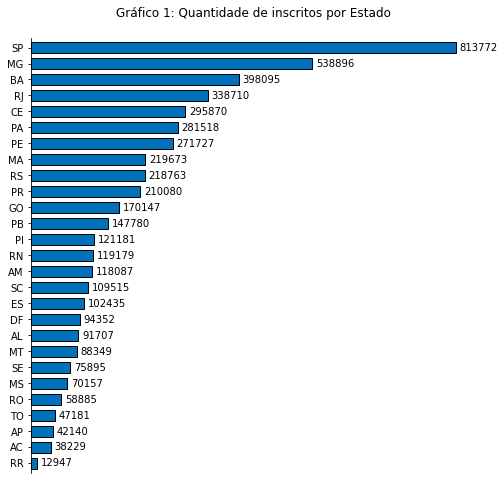

In [10]:
# Gráfico da quantidade de inscritos por Estado

fig,ax = plt.subplots(figsize=(8,8))

ax = dados.SG_UF_RESIDENCIA.value_counts().sort_values(ascending=True).plot(kind='barh',width=0.7, color='#0072bb',edgecolor='black',title='Gráfico 1: Quantidade de inscritos por Estado\n')
for p in ax.patches:
                _x = p.get_width() + float (7000)
                _y = p.get_y() + p.get_height()/2
                value = int(p.get_width())
                ax.text(_x, _y, value, va='center')
plt.xlabel('')
plt.xticks(rotation=0)
plt.xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False);

Os dados expostos na tabela e no gráfico 1 permitem determinar os Estados com mais inscritos e com menos inscritos no Enem 2019.

Top 3 de Estados com mais inscritos no Enem 2019
 - 1º - São Paulo - 813772 inscritos (15.97%)
 - 2º - Minas Gerais - 538896 inscritos (10.58%)
 - 3º - Bahia - 398095 inscritos (7.81%)
 
Top 3 de Estados com menos inscritos no Enem 2019
 - 1º - Roraima - 12947 inscritos (0.25%)
 - 2º - Acre - 38229 inscritos (0.75%)
 - 3º - Amapá - 42140 inscritos (0.83%)

### 2. Variável: TP_SEXO

In [11]:
#Tabela com valores absolutos e relativos do número de inscritos por sexo

tp_sexo_abs = dados.groupby('TP_SEXO')['TP_SEXO'].count().sort_values(ascending=False)
tp_sexo_rel = (dados.groupby('TP_SEXO')['TP_SEXO'].count()/dados.shape[0]).round(4)
tstable = pd.DataFrame((tp_sexo_abs,tp_sexo_rel*100), index=['Total','(%)']).transpose()

print("\nTabela 4: Distribuição de inscritos por sexo")
tstable


Tabela 4: Distribuição de inscritos por sexo


,Total,(%)
TP_SEXO,,
Feminino,3031822.0,59.5
Masculino,2063448.0,40.5


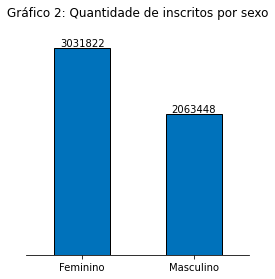

In [12]:
# Gráfico da quantidade de inscritos por sexo

fig,ax = plt.subplots(figsize=(4,4))

ax = dados.TP_SEXO.value_counts().plot(kind='bar',width=0.5, color='#0072bb',edgecolor='black',title='Gráfico 2: Quantidade de inscritos por sexo\n')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

plt.xlabel('')
plt.xticks(rotation=0)
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False);

Pelo gráfico 2 e pela tabela de distribuição de inscritos por sexo, é possível notar que no Enem 2019 a quantidade de pessoas inscritas do sexo feminino (3031822) foi maior que a quantidade de inscritos do sexo masculino (2063448). Estes números indicam que 59.5% dos inscritos eram do sexo feminino, e 40,5% eram do sexo masculino.

### 3. Variável: TP_ESTADO_CIVIL

In [13]:
#Tabela com valores absolutos e relativos do número de inscritos por tipo de estado civil

tp_estciv_abs = dados.groupby('TP_ESTADO_CIVIL')['TP_ESTADO_CIVIL'].count().sort_values(ascending=False)
tp_estciv_rel = (dados.groupby('TP_ESTADO_CIVIL')['TP_ESTADO_CIVIL'].count()/dados.shape[0]).round(4)
tectable = pd.DataFrame((tp_estciv_abs,tp_estciv_rel*100), index=['Total','(%)']).transpose()

print("\nTabela 5: Distribuição de inscritos por estado civil")
tectable


Tabela 5: Distribuição de inscritos por estado civil


,Total,(%)
TP_ESTADO_CIVIL,,
Solteiro(a),4398485.0,86.32
Casado(a)/Mora com companheiro(a),395855.0,7.77
Não informado,206800.0,4.06
Divorciado(a)/Desquitado(a)/Separado(a),87894.0,1.73
Viúvo(a),6236.0,0.12


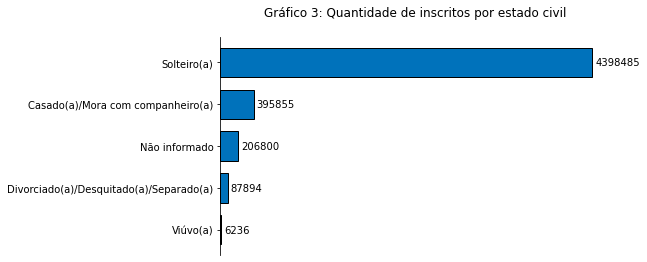

In [14]:
# Gráfico da quantidade de inscritos por estado civil

fig,ax = plt.subplots(figsize=(7,4))

ax = dados.TP_ESTADO_CIVIL.value_counts().sort_values(ascending=True).plot(kind='barh',width=0.7, color='#0072bb',edgecolor='black',title='Gráfico 3: Quantidade de inscritos por estado civil\n')
for p in ax.patches:
                _x = p.get_width() + float (35000)
                _y = p.get_y() + p.get_height()/2
                value = int(p.get_width())
                ax.text(_x, _y, value, va='center')
plt.xlabel('')
plt.xticks(rotation=0)
plt.xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False);

Pelo gráfico 3 e pela tabela, percebe-se que a maior parte dos inscritos que responderam esta pergunta do formulário de inscrição são pessoas solteiras (86.32%). Na sequência, encontramos as pessoas casadas ou que moram com o companheiro (7.77%), e os dados de pessoas que não informaram o estado civil (4.06%). Por último, temos as pessoas divorciadas, desquitadas e separadas (1.73%), e as pessoas viúvas (0.12%).

### 4. Variável: TP_COR_RACA

In [15]:
#Tabela com valores absolutos e relativos do número de inscritos por cor/raça declarada

tp_cor_raca_abs = dados.groupby('TP_COR_RACA')['TP_COR_RACA'].count().sort_values(ascending=False)
tp_cor_raca_rel = (dados.groupby('TP_COR_RACA')['TP_COR_RACA'].count()/dados.shape[0]).round(4)
crtable = pd.DataFrame((tp_cor_raca_abs,tp_cor_raca_rel*100), index=['Total','(%)']).transpose()

print("\nTabela 6: Distribuição de inscritos por cor/raça declarada")
crtable


Tabela 6: Distribuição de inscritos por cor/raça declarada


,Total,(%)
TP_COR_RACA,,
Parda,2364063.0,46.40
Branca,1831779.0,35.95
Preta,648309.0,12.72
Amarela,116162.0,2.28
Não declarado,103201.0,2.03
Indígena,31756.0,0.62


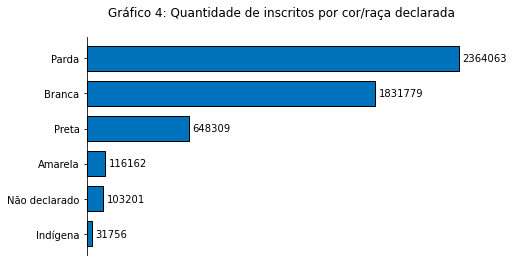

In [16]:
# Gráfico da quantidade de inscritos por cor/raça

fig,ax = plt.subplots(figsize=(7,4))

ax = dados.TP_COR_RACA.value_counts().sort_values(ascending=True).plot(kind='barh',width=0.7, color='#0072bb',edgecolor='black',title='Gráfico 4: Quantidade de inscritos por cor/raça declarada\n')
for p in ax.patches:
                _x = p.get_width() + float (25000)
                _y = p.get_y() + p.get_height()/2
                value = int(p.get_width())
                ax.text(_x, _y, value, va='center')
plt.xlabel('')
plt.xticks(rotation=0)
plt.xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False);

Os dados apresentados no gráfico 4 e na tabea acima indicam que a maior parte das pessoas que se inscreveram no Enem 2019 se declararam da cor parda, totalizando 2364063 pessoas, o que representa 46.40% do número total de inscritos. Conforme o gráfico e a tabela acima, pode-se notar que na sequência tempos pessoas que se declararam das cores branca (35.95%), preta (12.72%) e amarela (2.28%). Os dados mostram ainda que 103201 (2.03%) pessoas preferiram não declarar nenhuma das cores/raças, e que 31756 (0.62%) das pessoas inscritas se declararam da raça indígena.

### 5. Variável: TP_ESCOLA

In [17]:
#Tabela com valores absolutos e relativos do número de inscritos por cor/raça declarada

tp_escola_abs = dados.groupby('TP_ESCOLA')['TP_ESCOLA'].count().sort_values(ascending=False)
tp_escola_rel = (dados.groupby('TP_ESCOLA')['TP_ESCOLA'].count()/dados.shape[0]).round(4)
esctable = pd.DataFrame((tp_escola_abs,tp_escola_rel*100), index=['Total','(%)']).transpose()

print("\nTabela 7: Distribuição de inscritos por tipo de escola:")
esctable


Tabela 7: Distribuição de inscritos por tipo de escola:


,Total,(%)
TP_ESCOLA,,
Não respondeu,3629376.0,71.23
Pública,1247262.0,24.48
Privada,218632.0,4.29


Percebe-se que a maior parte das pessoas não responderam o item do questionário referente ao tipo de escola. Isto pode se dar pelo fato de existirem pessoas que já concluíram o ensino médio há algum tempo e resolveram realizar o exame em um momento posterior, ou ao fato de algumas pessoas estudarem nos dois tipos de escolas em períodos distintos (matutino, vespertino ou noturno), ou ainda por uma simples opção de não responder o questionamento do formulário.
<p>Abaixo, será feita uma análise do percentual ao levar em conta apenas as pessoas que responderam a pergunta.

In [18]:
# Retirando as pessoas que não responderam da análise

escola = dados.drop(dados[dados['TP_ESCOLA'].str.contains('Não respondeu')].index.tolist())

In [20]:
print(f'O número de inscritos que responderam o questionário é {escola.shape[0]}')

O número de inscritos que responderam o questionário é 1465894


In [21]:
#Tabela com valores absolutos e relativos do número de inscritos por cor/raça declarada

tp_escola2_abs = escola.groupby('TP_ESCOLA')['TP_ESCOLA'].count().sort_values(ascending=False)
tp_escola2_rel = (escola.groupby('TP_ESCOLA')['TP_ESCOLA'].count()/escola.shape[0]).round(4)
esc2table = pd.DataFrame((tp_escola2_abs,tp_escola2_rel*100), index=['Total','(%)']).transpose()

print("\nTabela 8: Distribuição de inscritos que responderam a pergunta por tipo de escola")
esc2table


Tabela 8: Distribuição de inscritos que responderam a pergunta por tipo de escola


,Total,(%)
TP_ESCOLA,,
Pública,1247262.0,85.09
Privada,218632.0,14.91


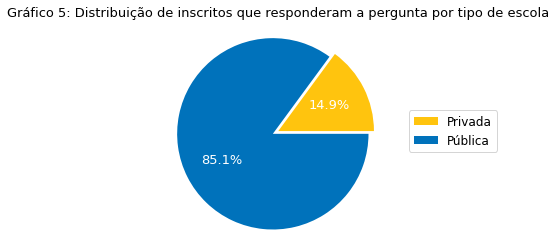

In [22]:
x = escola.groupby(['TP_ESCOLA'])['TP_ESCOLA'].count()
colors=['#ffc40e','#0072bb']
x.plot(kind='pie', autopct="%1.1f%%", explode=[0,0.07], colors=colors, textprops=dict(color="w", size=13), radius=1.1)
plt.legend(bbox_to_anchor=(1.1,0.5), loc="center left", borderaxespad=0, fontsize=12)
plt.title("Gráfico 5: Distribuição de inscritos que responderam a pergunta por tipo de escola", fontsize=13)
plt.axis('off');

O gráfico 5 indica que das pessoas que responderam esta pergunta do questionário, a maioria é de escola pública.

### 6. Variável: Q006 - Renda familiar mensal

In [23]:
# Tabela com a quantidade e a porcentagem da renda familiar mensal

renda_mensal_abs = dados.groupby('Q006')['Q006'].count().sort_values(ascending=False)
renda_mensal_rel = (dados.groupby('Q006')['Q006'].count()/dados.shape[0]).round(4).sort_values(ascending=False)
rmtable = pd.DataFrame((renda_mensal_abs,renda_mensal_rel*100), index=['Total','(%)']).transpose()

print("\nTabela 9: Renda familiar mensal declarada")
rmtable


Tabela 9: Renda familiar mensal declarada


,Total,(%)
Q006,,
De 998.01 até 1497.00,1311465.0,25.74
Até 998.00,1273250.0,24.99
De 1497.01 até 1996.00,499616.0,9.81
De 1996.01 até 2495.00,475568.0,9.33
De 2994.01 até 3992.00,301922.0,5.93
Nenhuma renda,232075.0,4.55
De 2495.01 até 2994.00,226251.0,4.44
De 3992.01 até 4990.00,192912.0,3.79
De 4990.01 até 5988.00,143652.0,2.82


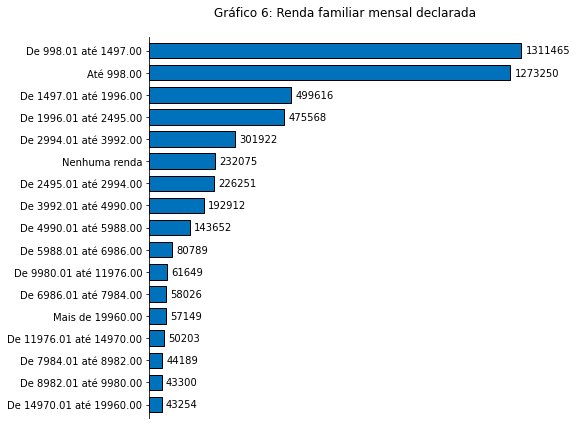

In [24]:
# Gráfico da renda familiar mensal declarada

fig,ax = plt.subplots(figsize=(7,7))

ax = dados.Q006.value_counts().sort_values(ascending=True).plot(kind='barh',width=0.7, color='#0072bb',edgecolor='black',title='Gráfico 6: Renda familiar mensal declarada\n')
for p in ax.patches:
                _x = p.get_width() + float (15000)
                _y = p.get_y() + p.get_height()/2
                value = int(p.get_width())
                ax.text(_x, _y, value, va='center')
plt.xlabel('')
plt.xticks(rotation=0)
plt.xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False);

O gráfico 6 mostra que as duas primeiras faixas de renda, sem contar com as pessoas que não possuem nenhuma renda, são as com concentram a maior quantidade de pessoas inscritas. Estas faixas de renda juntas totalizam 2584715 pessoas, de um total de 5095270 pessoas inscritas. Isto significa que 50.73% das pessoas inscritas possuem uma renda familiar até R$1497.

### 7. Variável: NU_IDADE

In [39]:
idade = dados['NU_IDADE'].dropna()

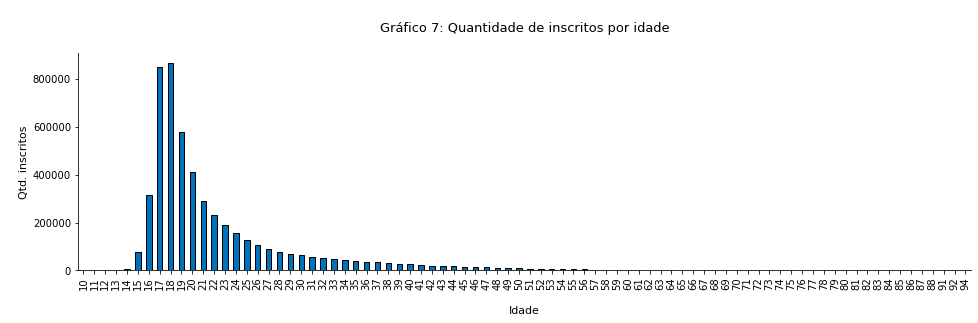

In [40]:
# Gráfico da quantidade de inscritos por idade

fig,ax = plt.subplots(figsize=(16,4))

idade.astype(int).value_counts().sort_index().plot(kind='bar', color='#0072bb', edgecolor='black')

plt.title('\nGráfico 7: Quantidade de inscritos por idade\n', fontsize=13)
plt.xlabel('\nIdade', fontsize=11)
plt.ylabel('\nQtd. inscritos', fontsize=11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [26]:
# Variáveis estatísticas

dados['NU_IDADE'].describe().round(2)

count    5095201.00
mean          22.09
std            7.45
min           10.00
25%           18.00
50%           19.00
75%           24.00
max           94.00
Name: NU_IDADE, dtype: float64

In [27]:
# Moda

dados['NU_IDADE'].mode()[0]

18.0

In [28]:
# Número de inscritos com 18 anos de idade

print(f' Número de inscritos com 18 anos de idade: {(dados.NU_IDADE == 18).sum()}')

 Número de inscritos com 18 anos de idade: 864186


Pela análise das variáveis estatísticas, percebe-se que a média de idade dos candidatos inscritos é de 22 anos, sendo que 75% dos candidatos apresentam idade menor que 24 anos. Além disso, a menor idade de um candidato inscrito é 10 anos e a maior idade é 94 anos.
<p>Ao avaliar a moda da idade dos candidatos inscritos, conclui-se que a maior parte dos inscritos possuem 18 anos de idade, que junto com a idade de 17 anos formam o grupo das duas idades que se espera que tenham mais pessoas realizando a prova.
<p> As pessoas com idade inferior a 17 anos recebem o nome de 'treineiros', que são pessoas que, normalmente, não irão concluir o ensino médio no ano da realização do exame. Por este motivo, estas pessoas não irão entrar no processo de seleção do vestibular, mas elas participam da prova para obter experiência e começar a sua preparação para os anos seguintes, quando estas irão disputar uma vaga em uma universidade.
<p> Já as pessoas acima de 17 anos, normalmente, são pessoas que já estão disputando uma vaga em uma universidade. Podem ser pessoas que estão participando do exame pela primeira vez ou pessoas que buscam melhorar a sua nota em relação aos anos anteriores. Tem-se ainda pessoas que estão realizando o exame apenas com o objetivo de testar seus conhecimentos, nesta faixa acima dos 17 anos. 
    

### 8. Variável: NOTA_MEDIA

Esta variável foi calculada a partir das variáveis NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT do dataset.

#### 8.1. Tratamento dos dados

Abaixo, tem-se novamente a quantidade de valores nulos no dataset inicial.

In [29]:
# Verificando a quantidade de dados nulos no dataset

dados.isnull().sum()

SG_UF_RESIDENCIA          0
NU_IDADE                 69
TP_SEXO                   0
TP_ESTADO_CIVIL           0
TP_COR_RACA               0
TP_ESCOLA                 0
NU_NOTA_CN          1384837
NU_NOTA_CH          1172125
NU_NOTA_LC          1172125
NU_NOTA_MT          1384837
NU_NOTA_REDACAO     1172126
Q006                      0
dtype: int64

O primeiro passo é eliminar os valores nulos do dataset original, e armazenar o resultado desta ação em um novo dataset, que será chamado de notas.

In [30]:
# Eliminando os dados nulos

notas = dados.dropna()

In [31]:
# Verificando novamente a presença de dados nulos

notas.isnull().sum()

SG_UF_RESIDENCIA    0
NU_IDADE            0
TP_SEXO             0
TP_ESTADO_CIVIL     0
TP_COR_RACA         0
TP_ESCOLA           0
NU_NOTA_CN          0
NU_NOTA_CH          0
NU_NOTA_LC          0
NU_NOTA_MT          0
NU_NOTA_REDACAO     0
Q006                0
dtype: int64

#### 8.2. Quantificação do dataset após eliminar os valores nulos

In [32]:
print(f'A Quantidade total de inscritos no Enem 2019 foi {dados.shape[0]}, já a quantidade de inscritos, desconsiderando aqueles que possuem dados de nota nulos, no Enem 2019 foi {notas.shape[0]}.')

A Quantidade total de inscritos no Enem 2019 foi 5095270, já a quantidade de inscritos, desconsiderando aqueles que possuem dados de nota nulos, no Enem 2019 foi 3701947.


Estes 3701947 são os candidatos que realizaram as duas provas do Enem neste ano.

#### 8.3. Gerando as colunas com a média aritmética total das provas objetivas de cada participante e com a média aritmética da soma das notas das provas objetivas e da redação de cada participante   

Neste momento, será gerada um coluna com as médias para cada candidato das provas objetivas, assim como uma coluna com a média geral do candidato, considerando as provas objetivas e a redação.

In [33]:
# Gerando uma coluna com a média aritmética simples das notas dos inscritos nas provas objetivas do dataset sem dados nulos

notas['NOTA_MEDIA_OBJ'] = (notas['NU_NOTA_CN'] + notas['NU_NOTA_CH'] + notas['NU_NOTA_LC'] + notas['NU_NOTA_MT']) / 4 

C:\Users\rodri\AppData\Local\Temp/ipykernel_700/3074742479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas['NOTA_MEDIA_OBJ'] = (notas['NU_NOTA_CN'] + notas['NU_NOTA_CH'] + notas['NU_NOTA_LC'] + notas['NU_NOTA_MT']) / 4


In [34]:
# Gerando uma coluna com a média aritmética simples das notas dos inscritos do dataset sem dados nulos

notas['NOTA_MEDIA_TOT'] = ((notas['NU_NOTA_CN'] + notas['NU_NOTA_CH'] + notas['NU_NOTA_LC'] + notas['NU_NOTA_MT'] + notas['NU_NOTA_REDACAO']) / 5).round(2)

C:\Users\rodri\AppData\Local\Temp/ipykernel_700/625428892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas['NOTA_MEDIA_TOT'] = ((notas['NU_NOTA_CN'] + notas['NU_NOTA_CH'] + notas['NU_NOTA_LC'] + notas['NU_NOTA_MT'] + notas['NU_NOTA_REDACAO']) / 5).round(2)


Abaixo, segue uma visualização das colunas geradas lado a lado. O objetivo é facilitar a visualização dos dados.

In [35]:
# visualização do dataset apenas com as colunas referentes às notas 
print("\nTabela 10: Notas e médias obtidas pelos candidatos")

notas[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','NOTA_MEDIA_OBJ','NOTA_MEDIA_TOT']].head(10)



Tabela 10: Notas e médias obtidas pelos candidatos


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_MEDIA_OBJ,NOTA_MEDIA_TOT
3,483.8,503.6,537.3,392.0,460.0,479.175,475.34
4,513.6,575.5,570.7,677.0,860.0,584.200,639.36
5,563.7,644.9,564.2,675.3,800.0,612.025,649.62
6,484.6,488.4,507.2,594.7,600.0,518.725,534.98
9,543.9,548.1,502.5,480.7,400.0,518.800,495.04
11,518.2,351.7,417.6,459.0,500.0,436.625,449.30
12,373.8,393.6,451.0,484.7,300.0,425.775,400.62
13,458.9,441.6,413.0,399.0,240.0,428.125,390.50
16,390.1,453.0,515.2,461.5,520.0,454.950,467.96
18,415.7,379.2,470.2,375.1,560.0,410.050,440.04


#### 8.4. Distribuição das notas médias totais

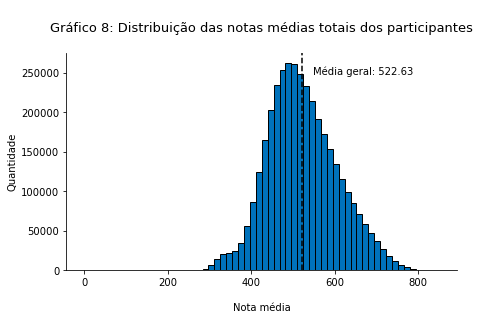

In [36]:
# Histograma mostrando a distribuição da média de nota total dos participantes

fig,ax = plt.subplots(figsize=(7,4))

media = notas.NOTA_MEDIA_TOT.mean()

notas.NOTA_MEDIA_TOT.plot(kind='hist', color='#0072bb', edgecolor='black', bins=60)

plt.axvline(media, color='black', linestyle='dashed', linewidth=1.5)
min_ylim, max_ylim = plt.ylim()
plt.text(notas.NOTA_MEDIA_TOT.mean()*1.05, max_ylim*0.9, 'Média geral: {:.2f}'.format(notas.NOTA_MEDIA_TOT.mean()))

plt.title('\nGráfico 8: Distribuição das notas médias totais dos participantes\n', fontsize=13)
plt.xlabel('\nNota média')
plt.ylabel('Quantidade')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

#### 8.5. Nota média por disciplina

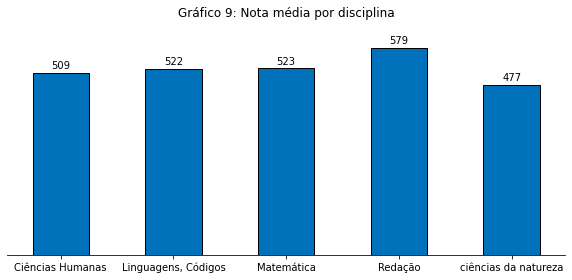

In [37]:
# Gráfico da nota média por disciplina

medias = {'ciências da natureza':np.mean(notas['NU_NOTA_CN']),
          'Ciências Humanas':np.mean(notas['NU_NOTA_CH']),
          'Linguagens, Códigos':np.mean(notas['NU_NOTA_LC']),
          'Matemática':np.mean(notas['NU_NOTA_MT']),
          'Redação':np.mean(notas['NU_NOTA_REDACAO'])}

lists = sorted(medias.items()) 

x1, y1 = zip(*lists) 

fig,ax = plt.subplots(figsize=(10,4))

plt.bar(x1, y1, color='#0072bb', edgecolor='black', width=0.5)

for xpos, ypos, yval in zip(x1,y1,y1):
    plt.text(xpos, ypos+20, int(yval), ha="center", va="center")               
                
plt.title('Gráfico 9: Nota média por disciplina\n')
plt.yticks([])
plt.ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

Nota-se, pelo gráfico, que dentre as disciplinas cobradas no Enem, a redação foi aquela na qual os participantes obtiveram a maior média de nota. Na sequência, temos matemática, linguagens e códigos, ciências humanas, e ciências da natureza, respectivamente.

Vale ressaltar que as notas das disciplinas do Enem, com exceção da prova de redação, são calculadas utilizando a Teoria de Resposta ao Item (TRI), o que faz com que as notas não sejam uma simples soma das questões corretas assinaladas pelo examinado nas provas. Mais detalhes sobre a TRI podem ser obtidos no [portal do Ministério da Educação (MEC)](http://portal.mec.gov.br/component/tags/tag/34530).

#### 8.6. Nota média por Estado

Neste item, serão gerados dois gráficos, sendo um com a nota média da prova objetiva por Estado, e o outro com a nota média total (considerando tambem a redação) por Estado.

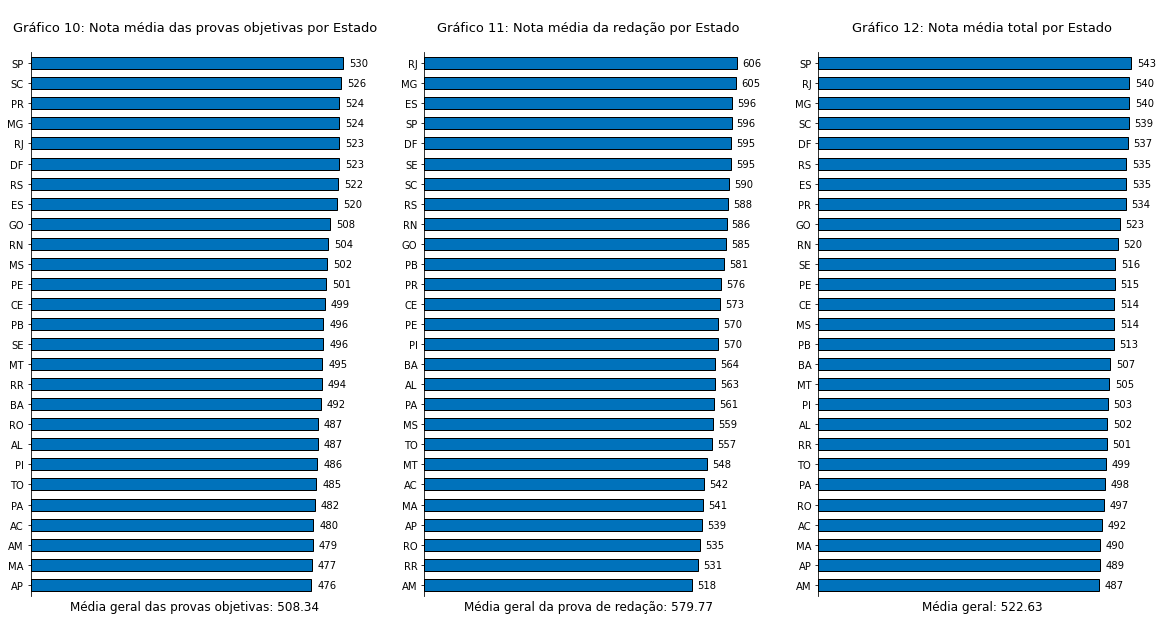

In [38]:
# Gráficos da nota média por Estado

plt.figure(figsize=(20, 10))

plt.subplot(131)

medias_uf_obj = notas.groupby('SG_UF_RESIDENCIA')['NOTA_MEDIA_OBJ'].mean().sort_values()
ax = medias_uf_obj.plot(kind='barh', width=0.6, color='#0072bb', edgecolor='black')

for p in ax.patches:
                _x = p.get_width() + float (10)
                _y = p.get_y() + p.get_height()/2
                value = int(p.get_width())
                ax.text(_x, _y, value, va='center')

plt.title('\nGráfico 10: Nota média das provas objetivas por Estado\n', fontsize=13)
plt.xticks([])
plt.ylabel('')
plt.xlabel('Média geral das provas objetivas: {:.2f}'.format(notas.NOTA_MEDIA_OBJ.mean()), fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.subplot(132)

medias_uf_tot = notas.groupby('SG_UF_RESIDENCIA')['NU_NOTA_REDACAO'].mean().sort_values()
ax = medias_uf_tot.plot(kind='barh', width=0.6, color='#0072bb', edgecolor='black')

for p in ax.patches:
                _x = p.get_width() + float (10)
                _y = p.get_y() + p.get_height()/2
                value = int(p.get_width())
                ax.text(_x, _y, value, va='center')

plt.title('\nGráfico 11: Nota média da redação por Estado\n', fontsize=13)
plt.xticks([])
plt.ylabel('')
plt.xlabel('Média geral da prova de redação: {:.2f}'.format(notas.NU_NOTA_REDACAO.mean()), fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.subplot(133)

medias_uf_tot = notas.groupby('SG_UF_RESIDENCIA')['NOTA_MEDIA_TOT'].mean().sort_values()
ax = medias_uf_tot.plot(kind='barh', width=0.6, color='#0072bb', edgecolor='black')

for p in ax.patches:
                _x = p.get_width() + float (10)
                _y = p.get_y() + p.get_height()/2
                value = int(p.get_width())
                ax.text(_x, _y, value, va='center')
                
plt.title('\nGráfico 12: Nota média total por Estado\n', fontsize=13)
plt.xticks([])
plt.ylabel('')
plt.xlabel('Média geral: {:.2f}'.format(notas.NOTA_MEDIA_TOT.mean()), fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False);

Ao analisar os gráficos 10 e 12, pode-se gerar um Top 5 da nota média das provas objetivas por Estado, e também um Top 5 da nota média total (provas objetivas + redação) por Estado.

Top 5 da nota média das provas objetivas por Estado:
 - 1º - São Paulo (SP) - 530 pontos
 - 2º - Santa Catarina (SC) - 526 pontos
 - 3º - Paraná (PR) - 524 pontos
 - 4º - Minas Gerais (MG) - 524 pontos
 - 5º - Rio de Janeiro (RJ) - 523 pontos

Top 5 da nota média total por Estado:
 - 1º - São Paulo (SP) - 543 pontos
 - 2º - Rio de Janeiro (RJ) - 540 pontos
 - 3º - Minas Gerais (MG) - 540 pontos
 - 4º - Santa Catarina (SC) - 539 pontos
 - 5º - Distrito Federal (DF) - 537 pontos

Em geral, houve um aumento da média das notas por Estado ao considerar as notas de redação na média. Também é possível notar que o Top 5 foi alterado ao considerar a nota da redação na média. Isso fica evidente ao analisar o gráfico 11, que mostra que o ranking de notas médias de redação é diferente em relação ao ranking de notas médias da prova objetiva. Ainda é possível notar que a nota da redação tem grande influência na média total dos participantes do Enem, como pode ser visto ao analisar o salto de colocações do Estado do Rio de Janeiro ao considerar a nota da redação, saindo da 5ª para a 2ª colocação. 